In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('VideoGamesSales.csv')
df = df.drop_duplicates()
df['Region'] = df["Region"].fillna('North')
print(df['Region'])


0          West
1          West
2         South
3       Central
4         South
         ...   
5904       West
5905       West
5906       West
5907       West
5908       West
Name: Region, Length: 5893, dtype: object


In [5]:
df["NA_Sales"] = df["NA_Sales"].replace('[$]',"",regex = True)
df["NA_Sales"] = pd.to_numeric(df["NA_Sales"],errors = 'coerce')
na_mean = int(df["NA_Sales"].mean())
df['NA_Sales'] = df['NA_Sales'].fillna(na_mean)

In [6]:
df["Country"] = df["Country"].replace({'USA':'United States'})
df['Country'] = df['Country'].str.title()
df=df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})

In [7]:
sales_cap = df['National Sales'].quantile(0.95)
df['National Sales'] = np.where(df['National Sales'] > sales_cap, sales_cap, df['National Sales'])
df.head(2)

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072


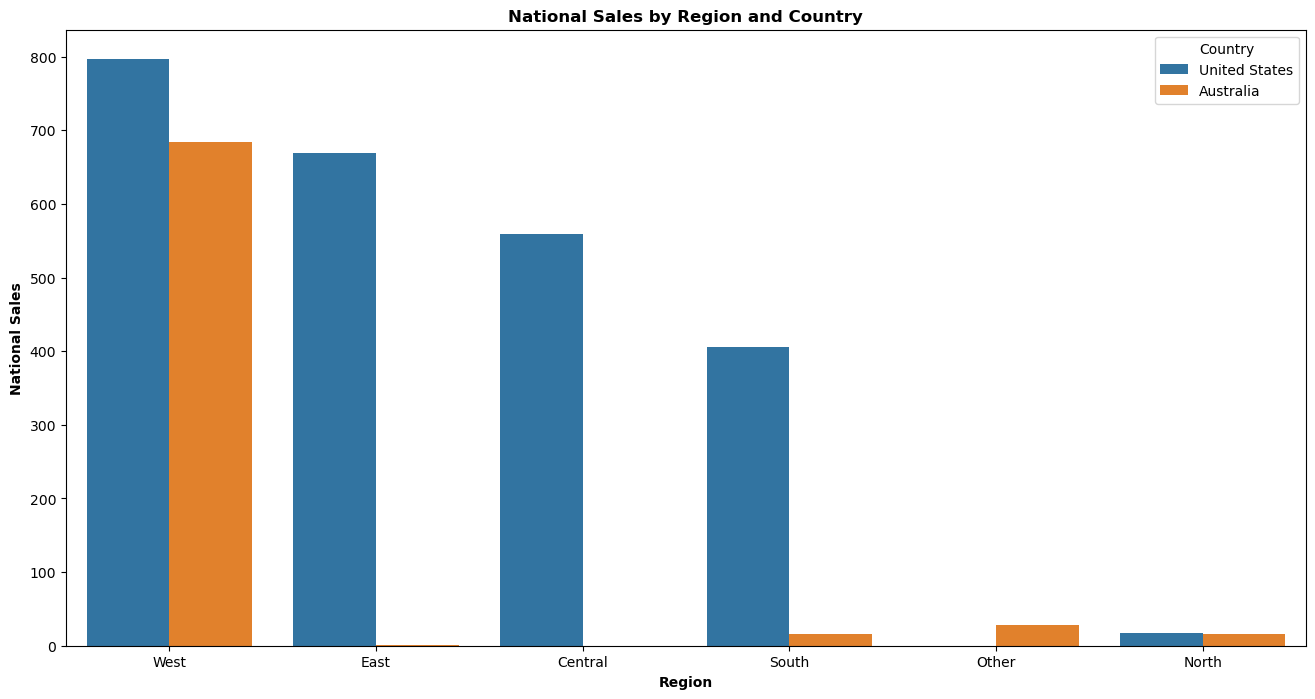

In [8]:
#create a bar Chart

National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales
plt.figure(figsize=(16, 8))
sns.barplot(data=National_Sales, x='Region', y='National Sales',hue='Country')
plt.title('National Sales by Region and Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

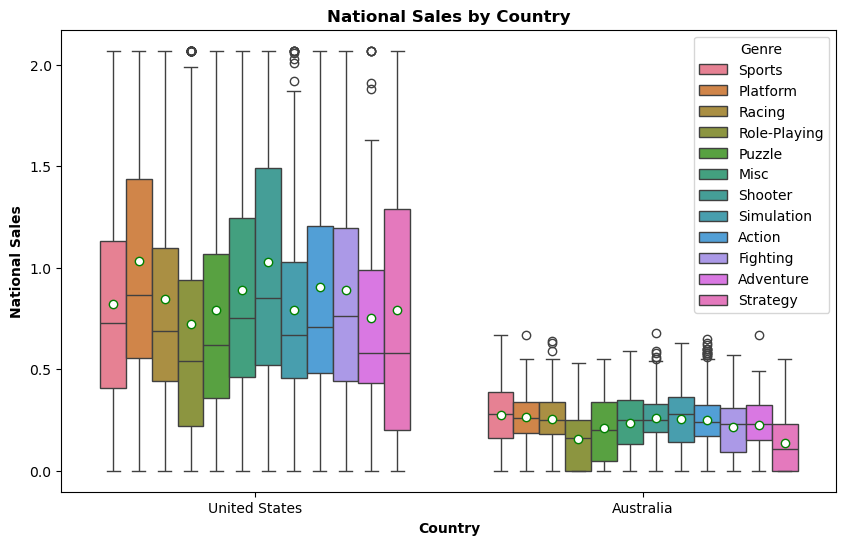

In [9]:
#Create Box Plot
# ,meanprops={"marker":"o"
#                                                                                   ,"markerfacecolor":"white"
#                                                                                   ,"markersize":"3"
#                                                                                   ,"markeredgecolor":"green"}
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='National Sales', data=df,showmeans=True,hue='Genre',meanprops={"marker":"o"
                                                                                   ,"markerfacecolor":"white"
                                                                                   ,"markersize":"6"
                                                                                 ,"markeredgecolor":"green"})

plt.title('National Sales by Country',fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

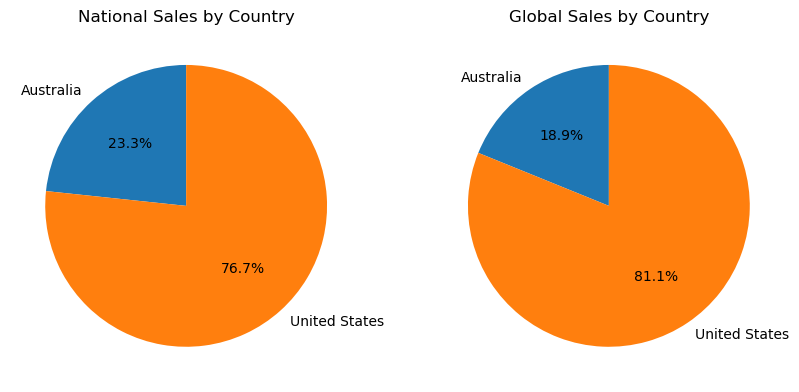

In [10]:
#create a pie Chart
Sales=df.groupby(['Country'])[['National Sales','Global Sales']].sum().reset_index()
Country=Sales['Country']
National_Sales=Sales['National Sales']
Global_Sales=Sales['Global Sales']

fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].pie(National_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Global Sales by Country')

plt.show()




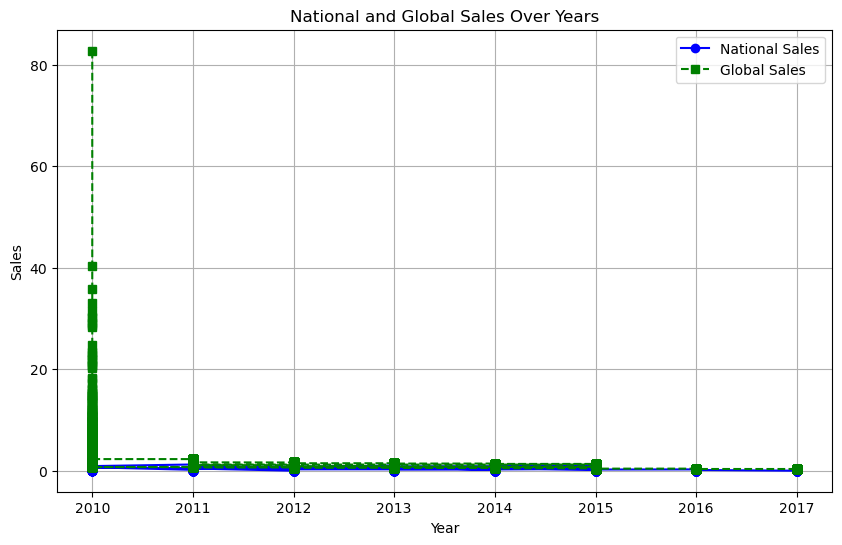

In [11]:
# Create a line chart
plt.figure(figsize=(10, 6))

# Line for National Sales
plt.plot(df['Year'], df['National Sales'], marker='o', linestyle='-', color='b', label='National Sales')

# Line for Global Sales
plt.plot(df['Year'], df['Global Sales'], marker='s', linestyle='--', color='g', label='Global Sales')

# Adding titles and labels
plt.title('National and Global Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()

# Display the line chart
plt.grid(True)
plt.show()